In [2]:
#Project Objective: CHIT1 correlations for 
    #a)Correlations for sALS,C9orf72 with % of Positive Cells (FC,MC,Hippo and SC)
    #b)Correlations for NNDC,FTD,AD with % of Positive Cells (FC,MC,Hippo)

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_excel('C:/Users/Vinisha/Downloads/Pathology_and_Clinical_Information_for_Stained_Cases.xlsx',header=0, sheet_name=1)

In [6]:
#a) Correlations for sALS,C9orf72 with % of Positive Cells (FC,MC,Hippo and SC)
df1=df[df['Disease State'].isin(["C9orf72","sALS"])]

In [7]:
df1

,Sample ID,"% of Pos Cells (MC, FC, or Hippo)",% of Pos Cells (SC),Disease State,Site of Onset,PMI (hrs),Age at death,Disease Duration (yrs),Sex (M/F),Ethnicity
0,GBB-16-07,1.122570,57.744500,C9orf72,Limb - right hand,7,61,0.90,Female,NaN
6,UCSD 82,51.373800,0.918347,C9orf72,Bulbar,NaN,54,2.50,Male,NaN
7,UCSD 91,2.824690,9.403060,C9orf72,Bulbar,NaN,61,3.50,Male,NaN
8,UCSD 120,0.020846,0.851323,C9orf72,Bulbar,NaN,64,7.50,Male,NaN
9,NEUNT618PCJ,0.088873,0.680062,C9orf72,NaN,15.27,58,NaN,Male,NaN
10,NEUZK363UAQ,0.266400,2.767190,C9orf72,NaN,13.88,73,NaN,Female,NaN
30,GWF15-10,3.668710,87.996700,sALS,Limb,37.5,63,2.00,Female,White
31,GWF15-11,0.000000,1.073620,sALS,Limb,6,68,8.00,Female,White
32,GWF15-12,0.174472,81.713900,sALS,NaN,7,74,3.92,Male,White
33,GWF15-13,3.116900,1.356690,sALS,Limb,7.5,67,2.92,Male,White


In [8]:
#NaN values from categorical columns were removed for accurate correlation
df1=df1.dropna(subset=["Disease State","PMI (hrs)","Age at death","Disease Duration (yrs)","Sex (M/F)","Ethnicity"],axis=0)
df1

,Sample ID,"% of Pos Cells (MC, FC, or Hippo)",% of Pos Cells (SC),Disease State,Site of Onset,PMI (hrs),Age at death,Disease Duration (yrs),Sex (M/F),Ethnicity
30,GWF15-10,3.668710,87.996700,sALS,Limb,37.5,63,2.00,Female,White
31,GWF15-11,0.000000,1.073620,sALS,Limb,6,68,8.00,Female,White
32,GWF15-12,0.174472,81.713900,sALS,NaN,7,74,3.92,Male,White
33,GWF15-13,3.116900,1.356690,sALS,Limb,7.5,67,2.92,Male,White
35,GWF16-18,1.178650,0.169361,sALS,Limb,4,60,2.67,Female,White
36,GWF16-19,0.172043,4.045760,sALS,NaN,5.5,39,3.83,Male,White
37,GWF16-20,0.097260,4.858300,sALS,Bulbar/Limb,4,63,3.08,Female,White
38,GWF16-21,33.348500,5.562270,sALS,NaN,21,83,2.08,Male,White
39,GWF18-26,1.225850,1.397690,sALS,NaN,6,69,2.00,Female,White
40,GWF18-27,0.083140,0.075220,sALS,NaN,5,61,2.50,Female,White


In [9]:
df1["Disease_State"]=pd.Categorical(df1['Disease State']).codes
df1["Sex"]=pd.Categorical(df1['Sex (M/F)']).codes

C:\Users\Vinisha\AppData\Local\Temp\7/ipykernel_40328/487312014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Disease_State"]=pd.Categorical(df1['Disease State']).codes
C:\Users\Vinisha\AppData\Local\Temp\7/ipykernel_40328/487312014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Sex"]=pd.Categorical(df1['Sex (M/F)']).codes


In [10]:
df1

,Sample ID,"% of Pos Cells (MC, FC, or Hippo)",% of Pos Cells (SC),Disease State,Site of Onset,PMI (hrs),Age at death,Disease Duration (yrs),Sex (M/F),Ethnicity,Disease_State,Sex
30,GWF15-10,3.668710,87.996700,sALS,Limb,37.5,63,2.00,Female,White,1,0
31,GWF15-11,0.000000,1.073620,sALS,Limb,6,68,8.00,Female,White,1,0
32,GWF15-12,0.174472,81.713900,sALS,NaN,7,74,3.92,Male,White,1,1
33,GWF15-13,3.116900,1.356690,sALS,Limb,7.5,67,2.92,Male,White,1,1
35,GWF16-18,1.178650,0.169361,sALS,Limb,4,60,2.67,Female,White,1,0
36,GWF16-19,0.172043,4.045760,sALS,NaN,5.5,39,3.83,Male,White,1,1
37,GWF16-20,0.097260,4.858300,sALS,Bulbar/Limb,4,63,3.08,Female,White,1,0
38,GWF16-21,33.348500,5.562270,sALS,NaN,21,83,2.08,Male,White,1,1
39,GWF18-26,1.225850,1.397690,sALS,NaN,6,69,2.00,Female,White,1,0
40,GWF18-27,0.083140,0.075220,sALS,NaN,5,61,2.50,Female,White,1,0


<AxesSubplot:>

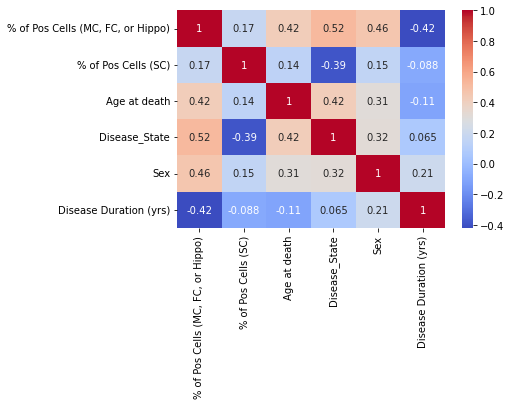

In [11]:
df_updated1=df1[["Sample ID","% of Pos Cells (MC, FC, or Hippo)","% of Pos Cells (SC)","PMI (hrs)","Age at death","Disease_State","Sex","Disease Duration (yrs)"]]
corr_matrix = df_updated1.corr(method='spearman')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [12]:
corr_matrix

,"% of Pos Cells (MC, FC, or Hippo)",% of Pos Cells (SC),Age at death,Disease_State,Sex,Disease Duration (yrs)
"% of Pos Cells (MC, FC, or Hippo)",1.000000,0.174825,0.421055,0.518200,0.460882,-0.420316
% of Pos Cells (SC),0.174825,1.000000,0.136843,-0.388650,0.153627,-0.087566
Age at death,0.421055,0.136843,1.000000,0.422518,0.308335,-0.110721
Disease_State,0.518200,-0.388650,0.422518,1.000000,0.316228,0.064889
Sex,0.460882,0.153627,0.308335,0.316228,1.000000,0.205196
Disease Duration (yrs),-0.420316,-0.087566,-0.110721,0.064889,0.205196,1.000000


In [31]:
df2=df[~df['Disease State'].isin(["C9orf72","sALS"])]

In [33]:
df2

,Sample ID,"% of Pos Cells (MC, FC, or Hippo)",% of Pos Cells (SC),Disease State,Site of Onset,PMI (hrs),Age at death,Disease Duration (yrs),Sex (M/F),Ethnicity
1,GBB-17-03,NaN,NaN,NNDC,NaN,18,58,NaN,Male,NaN
2,GBB-18-01,NaN,NaN,NNDC,NaN,10,68,NaN,Male,White
3,GBB-19-14,NaN,NaN,NNDC,NaN,45,67,NaN,Male,White
4,GBB-20-16,NaN,NaN,NNDC,NaN,24,71,NaN,Male,White
5,GBB-21-03,NaN,NaN,NNDC,NaN,47,72,NaN,Male,Black
11,S08627,0.093559,NaN,FTD,NaN,18.08,82,4.0,Male,White
12,S05020,0.039938,NaN,AD,NaN,26.83,78,10.0,Male,Hispanic
13,S14135,0.003774,NaN,FTD,NaN,23,81,46.0,Male,White
14,S00895,0.034871,NaN,FTD,NaN,16.88,79,8.0,Male,White
15,S09834,0.086321,NaN,AD,NaN,4.67,89,NaN,Female,Hispanic


In [34]:
#Removing GBB samples as it doesn't have %of cells
df2=df2.iloc[5:]

In [35]:
df2["Disease_State"]=pd.Categorical(df2['Disease State']).codes
df2["Sex"]=pd.Categorical(df2['Sex (M/F)']).codes
df2["Ethnicity_code"]=pd.Categorical(df2['Ethnicity']).codes
df2["Disease_Duration"]=pd.Categorical(df2['Disease Duration (yrs)']).codes

C:\Users\Vinisha\AppData\Local\Temp\7/ipykernel_40328/3609845531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Disease_State"]=pd.Categorical(df2['Disease State']).codes
C:\Users\Vinisha\AppData\Local\Temp\7/ipykernel_40328/3609845531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Sex"]=pd.Categorical(df2['Sex (M/F)']).codes
C:\Users\Vinisha\AppData\Local\Temp\7/ipykernel_40328/3609845531.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [36]:
df_updated2=df2[["Sample ID","% of Pos Cells (MC, FC, or Hippo)","PMI (hrs)","Age at death","Disease_State","Sex","Disease Duration (yrs)"]]

In [37]:
df_updated2

,Sample ID,"% of Pos Cells (MC, FC, or Hippo)",PMI (hrs),Age at death,Disease_State,Sex,Disease Duration (yrs)
11,S08627,0.093559,18.08,82,1,1,4.0
12,S05020,0.039938,26.83,78,0,1,10.0
13,S14135,0.003774,23,81,1,1,46.0
14,S00895,0.034871,16.88,79,1,1,8.0
15,S09834,0.086321,4.67,89,0,0,NaN
16,S11903,0.040251,13.45,86,1,0,NaN
17,S19794,0.000000,20.83,91,0,1,7.0
18,S18200,0.008053,12.03,74,0,0,6.0
19,S09299,0.009593,21.58,74,0,1,5.0
20,S03625,0.853448,12.08,86,0,0,NaN


<AxesSubplot:>

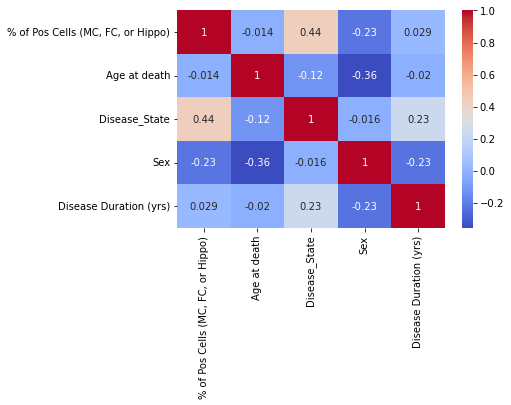

In [38]:
corr_matrix = df_updated2.corr(method='spearman')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [39]:
corr_matrix

,"% of Pos Cells (MC, FC, or Hippo)",Age at death,Disease_State,Sex,Disease Duration (yrs)
"% of Pos Cells (MC, FC, or Hippo)",1.000000,-0.014151,0.436439,-0.228373,0.028752
Age at death,-0.014151,1.000000,-0.119562,-0.357587,-0.019982
Disease_State,0.436439,-0.119562,1.000000,-0.015627,0.233435
Sex,-0.228373,-0.357587,-0.015627,1.000000,-0.230574
Disease Duration (yrs),0.028752,-0.019982,0.233435,-0.230574,1.000000
